In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pickle

In [2]:

def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="ast-container").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'https://scrapsfromtheloft.com/comedy/bo-burnham-what-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/hasan-minhaj-homecoming-king-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [3]:
transcripts = [url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
https://scrapsfromtheloft.com/comedy/bo-burnham-what-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
https://scrapsfromtheloft.com/comedy/hasan-minhaj-homecoming-king-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/

In [4]:
data = {}

for i in range(0, len(comedians)):
    data[comedians[i]] = transcripts[i]

In [5]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [6]:
data['louis'][:2]

['Intro Fade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog” I live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s real

In [7]:
data

{'louis': ['Intro Fade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
  '“The Old Lady And The Dog” I live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them

### CLEANING DATA

In [8]:
next(iter(data.keys()))

'louis'

In [9]:
next(iter(data.values()))

['Intro Fade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog” I live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s real

In [10]:
def converts(obj):
    combined = ' '.join(obj)
        
    return combined

In [11]:
dataset = {key : [converts(value)] for (key, value ) in data.items()}

In [12]:
dataset

{'louis': ['Intro Fade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all. “The Old Lady And The Dog” I live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’

In [13]:
pdframe =  pd.DataFrame.from_dict(dataset).transpose()
pdframe.columns = ["transcript"]
pdframe = pdframe.sort_index()

In [14]:
pdframe

,transcript
ali,"Ladies and gentlemen, please welcome to the st..."
anthony,"Thank you. Thank you. Thank you, San Francisco..."
bill,"[cheers and applause] All right, thank you! Th..."
bo,Bo What? Old MacDonald had a farm E I E I O An...
dave,This is Dave. He tells dirty jokes for a livin...
hasan,[theme music: orchestral hip-hop] [crowd roars...
jim,[Car horn honks] [Audience cheering] [Announce...
joe,[rock music playing] [audience cheering] [anno...
john,"Armed with boyish charm and a sharp wit, the f..."
louis,Intro Fade the music out. Let’s roll. Hold the...


In [15]:
pdframe.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through. And then, when they go to sleep, they just go to s

In [16]:
import re
import string

def clean_text(obj):
    obj = obj.lower()
    obj = re.sub('\[.*?\]', '', obj)
    obj = re.sub('[%s]' % re.escape(string.punctuation), '', obj)
    obj = re.sub('\w*\d\w*', '', obj)
    obj = re.sub('[‘’“”…]', '', obj)
    obj = re.sub('\n', '', obj)
    return obj

In [17]:
pdframe = pd.DataFrame(pdframe.transcript.apply(lambda x:clean_text(x)))


In [18]:
pd_const = pdframe

In [19]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

pdframe['full_name'] = full_names
pdframe

,transcript,full_name
ali,ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik
bill,all right thank you thank you very much thank...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan
john,armed with boyish charm and a sharp wit the fo...,John Mulaney
louis,intro fade the music out lets roll hold there ...,Louis C.K.


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv  = CountVectorizer( stop_words= 'english')
data_cv = cv.fit_transform(pdframe.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = pdframe.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [21]:
data_dtm = data_dtm.transpose()

In [22]:
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 69),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('wanna', 21),
  ('gotta', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 15),
  ('hes', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('work', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 40),
  ('dont', 38),
  ('joke', 37),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('just', 30),
  ('anthony', 27),
  ('say', 26),
  ('day', 26),
  ('guys', 23),
  ('people', 23),
  ('tell', 19),
  ('youre', 19),
  ('right', 18),
  ('think', 18),
  ('grandma', 18),
  ('thing', 17),
  ('time', 17),
  ('yeah', 17),
  ('jokes', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('okay', 16),
  ('family', 15),
  ('baby', 15),
  ('gonna', 15)],


In [23]:
for (name, words) in top_dict.items():
    print(name)
    l = ", ".join([word[0] for word in words[0:14]])
    print(l)
    print('-----')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, oh, wanna, gotta
-----
anthony
im, like, know, dont, joke, got, thats, said, just, anthony, say, day, guys, people
-----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
-----
bo
know, like, love, im, think, bo, just, stuff, repeat, dont, yeah, want, right, cos
-----
dave
like, know, said, just, im, shit, people, didnt, dont, ahah, time, thats, fuck, fucking
-----
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
-----
jim
like, im, dont, right, fucking, know, just, went, youre, people, thats, oh, day, think
-----
joe
like, people, just, dont, fcking, im, fck, thats, gonna, theyre, know, youre, think, shit
-----
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, time, hey, got
-----
louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, theres, cause
-----
mike
like, im, know, said, just

In [24]:
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 69),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('wanna', 21),
  ('gotta', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 15),
  ('hes', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('work', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 40),
  ('dont', 38),
  ('joke', 37),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('just', 30),
  ('anthony', 27),
  ('say', 26),
  ('day', 26),
  ('guys', 23),
  ('people', 23),
  ('tell', 19),
  ('youre', 19),
  ('right', 18),
  ('think', 18),
  ('grandma', 18),
  ('thing', 17),
  ('time', 17),
  ('yeah', 17),
  ('jokes', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('okay', 16),
  ('family', 15),
  ('baby', 15),
  ('gonna', 15)],


In [25]:
words = []
for (word, cnt) in top_dict[name]:
    words.append(word)
words
    

['right',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'youre',
 'went',
 'thats',
 'id',
 'people',
 'didnt',
 'little',
 'joke',
 'hes',
 'theyre',
 'ive',
 'thing',
 'going',
 'years',
 'day',
 'theres',
 'saying',
 'hed',
 'ill']

In [26]:
words =[]
top = [word for (word, count) in top_dict[name]]
for t in top:
        words.append(t)
        
len(words)

30

In [27]:
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 69),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('wanna', 21),
  ('gotta', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 15),
  ('hes', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('work', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 40),
  ('dont', 38),
  ('joke', 37),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('just', 30),
  ('anthony', 27),
  ('say', 26),
  ('day', 26),
  ('guys', 23),
  ('people', 23),
  ('tell', 19),
  ('youre', 19),
  ('right', 18),
  ('think', 18),
  ('grandma', 18),
  ('thing', 17),
  ('time', 17),
  ('yeah', 17),
  ('jokes', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('okay', 16),
  ('family', 15),
  ('baby', 15),
  ('gonna', 15)],


In [28]:
pdframe = pdframe.transpose()
pdframe

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
transcript,ladies and gentlemen please welcome to the sta...,thank you thank you thank you san francisco th...,all right thank you thank you very much thank...,bo what old macdonald had a farm e i e i o and...,this is dave he tells dirty jokes for a living...,whats up davis whats up im home i had to bri...,ladies and gentlemen please welcome to the ...,ladies and gentlemen welcome joe rogan wha...,armed with boyish charm and a sharp wit the fo...,intro fade the music out lets roll hold there ...,wow hey thank you thanks thank you guys hey se...,hello hello how you doing great thank you wow ...
full_name,Ali Wong,Anthony Jeselnik,Bill Burr,Bo Burnham,Dave Chappelle,Hasan Minhaj,Jim Jefferies,Joe Rogan,John Mulaney,Louis C.K.,Mike Birbiglia,Ricky Gervais


In [29]:
words =[]

for comedian in pdframe.columns:
    top = [word for (word, cnt) in top_dict[name]]
    for t in top:
        words.append(t)
words

['right',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'youre',
 'went',
 'thats',
 'id',
 'people',
 'didnt',
 'little',
 'joke',
 'hes',
 'theyre',
 'ive',
 'thing',
 'going',
 'years',
 'day',
 'theres',
 'saying',
 'hed',
 'ill',
 'right',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'youre',
 'went',
 'thats',
 'id',
 'people',
 'didnt',
 'little',
 'joke',
 'hes',
 'theyre',
 'ive',
 'thing',
 'going',
 'years',
 'day',
 'theres',
 'saying',
 'hed',
 'ill',
 'right',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'youre',
 'went',
 'thats',
 'id',
 'people',
 'didnt',
 'little',
 'joke',
 'hes',
 'theyre',
 'ive',
 'thing',
 'going',
 'years',
 'day',
 'theres',
 'saying',
 'hed',
 'ill',
 'right',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'youre',
 'went',
 'thats',
 'id',
 'people',
 'didnt',
 'littl

In [30]:
from collections import Counter
cnt  = Counter(words).most_common()
cnt

[('right', 12),
 ('like', 12),
 ('just', 12),
 ('im', 12),
 ('dont', 12),
 ('know', 12),
 ('said', 12),
 ('yeah', 12),
 ('fucking', 12),
 ('got', 12),
 ('say', 12),
 ('youre', 12),
 ('went', 12),
 ('thats', 12),
 ('id', 12),
 ('people', 12),
 ('didnt', 12),
 ('little', 12),
 ('joke', 12),
 ('hes', 12),
 ('theyre', 12),
 ('ive', 12),
 ('thing', 12),
 ('going', 12),
 ('years', 12),
 ('day', 12),
 ('theres', 12),
 ('saying', 12),
 ('hed', 12),
 ('ill', 12)]

In [31]:
add_stop =[]
for i in cnt: 
    if i[1]>6:
        add_stop.append(i[0])


In [32]:
add_stop

['right',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'youre',
 'went',
 'thats',
 'id',
 'people',
 'didnt',
 'little',
 'joke',
 'hes',
 'theyre',
 'ive',
 'thing',
 'going',
 'years',
 'day',
 'theres',
 'saying',
 'hed',
 'ill']

In [33]:
from sklearn.feature_extraction import text 
new_stop = list(text.ENGLISH_STOP_WORDS.union(add_stop))


In [34]:

new_cv = CountVectorizer(stop_words = new_stop)
new_data_cv = new_cv.fit_transform(pd_const.transcript)
new_data_cv = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
new_data_cv.index = pd_const.index
new_data_cv

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [35]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=new_stop, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

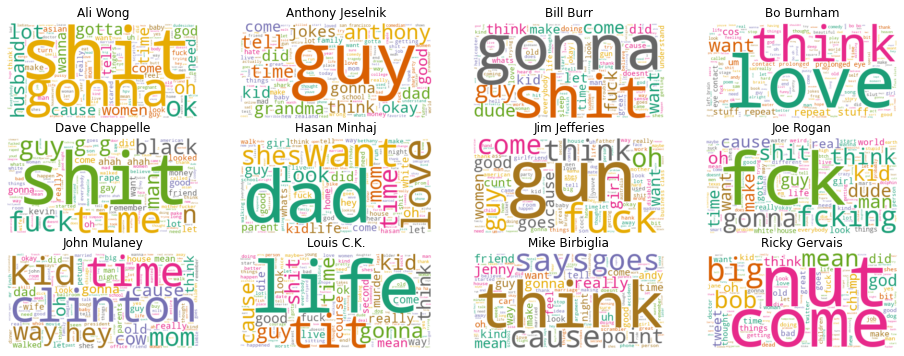

In [36]:
plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(pdframe.columns):
    wc.generate(pd_const.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

In [37]:
pdframe

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
transcript,ladies and gentlemen please welcome to the sta...,thank you thank you thank you san francisco th...,all right thank you thank you very much thank...,bo what old macdonald had a farm e i e i o and...,this is dave he tells dirty jokes for a living...,whats up davis whats up im home i had to bri...,ladies and gentlemen please welcome to the ...,ladies and gentlemen welcome joe rogan wha...,armed with boyish charm and a sharp wit the fo...,intro fade the music out lets roll hold there ...,wow hey thank you thanks thank you guys hey se...,hello hello how you doing great thank you wow ...
full_name,Ali Wong,Anthony Jeselnik,Bill Burr,Bo Burnham,Dave Chappelle,Hasan Minhaj,Jim Jefferies,Joe Rogan,John Mulaney,Louis C.K.,Mike Birbiglia,Ricky Gervais


In [38]:
new_data_cv_t = new_data_cv.transpose()
new_data_cv

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [39]:
data = new_data_cv_t  

In [40]:
uni_words = []
for comedian in new_data_cv_t.columns:
    uniques = new_data_cv_t[comedian].to_numpy().nonzero()[0].size
    uni_words.append(uniques)

In [41]:
uni_words

[1393, 1057, 1699, 1335, 1455, 1613, 1377, 1497, 1460, 1150, 1551, 1696]

In [42]:
data_words = pd.DataFrame(list(zip(full_names, uni_words)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,1057
9,Louis C.K.,1150
3,Bo Burnham,1335
6,Jim Jefferies,1377
0,Ali Wong,1393
4,Dave Chappelle,1455
8,John Mulaney,1460
7,Joe Rogan,1497
10,Mike Birbiglia,1551
5,Hasan Minhaj,1613


In [43]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,1057,3037,59,51.474576
3,Bo Burnham,1335,3256,60,54.266667
0,Ali Wong,1393,3369,60,56.150000
9,Louis C.K.,1150,3428,58,59.103448
4,Dave Chappelle,1455,4156,67,62.029851
6,Jim Jefferies,1377,4855,77,63.051948
10,Mike Birbiglia,1551,4836,76,63.631579
11,Ricky Gervais,1696,5064,79,64.101266
8,John Mulaney,1460,4110,62,66.290323
5,Hasan Minhaj,1613,4844,73,66.356164


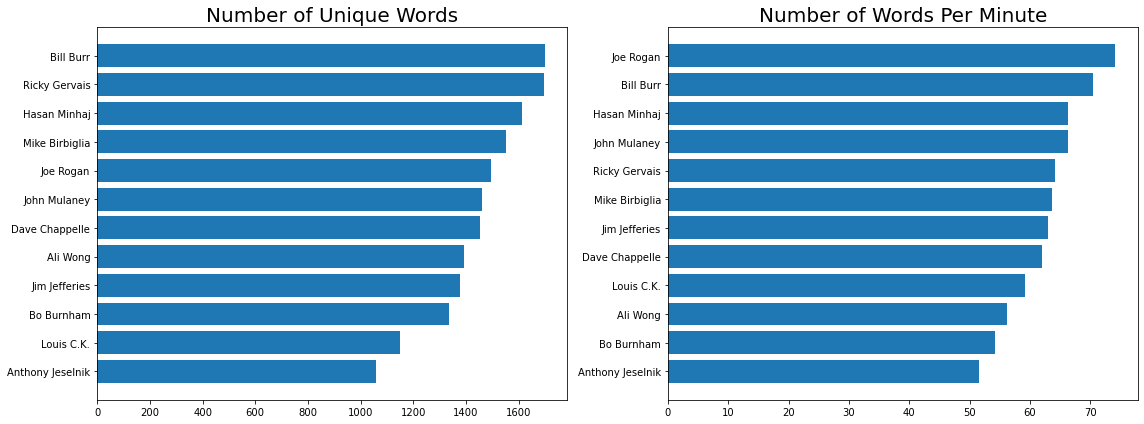

In [44]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

## Sentiment Analysis

In [45]:
from textblob import TextBlob
TextBlob('Cristiano Ronaldo is the Greatest of all time').sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [46]:
pd_const

,transcript,full_name
ali,ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik
bill,all right thank you thank you very much thank...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan
john,armed with boyish charm and a sharp wit the fo...,John Mulaney
louis,intro fade the music out lets roll hold there ...,Louis C.K.


In [47]:
pd_const['polarity'] = pd_const['transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)
pd_const['subjectivity'] = pd_const['transcript'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

In [48]:
pd_const

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.072369,0.483091
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.056375,0.567923
bill,all right thank you thank you very much thank...,Bill Burr,0.011604,0.545697
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.079147,0.555348
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,0.002027,0.518963
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.084056,0.467429
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.042561,0.539928
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.078400,0.539640
john,armed with boyish charm and a sharp wit the fo...,John Mulaney,0.079114,0.493259
louis,intro fade the music out lets roll hold there ...,Louis C.K.,0.058069,0.525449


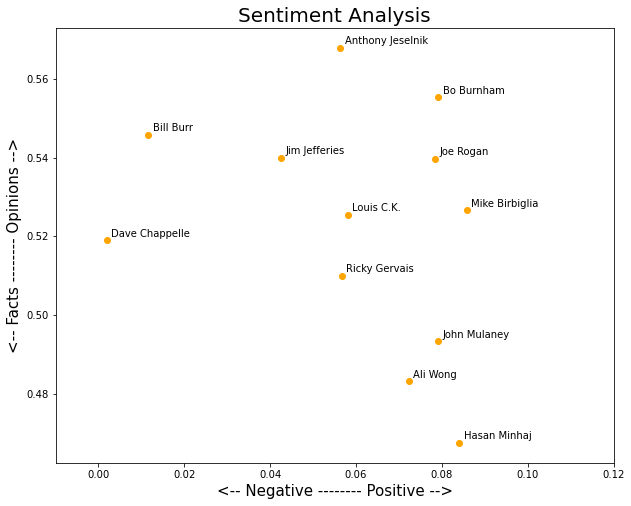

In [49]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(pd_const.index):
    x = pd_const.polarity.loc[comedian]
    y = pd_const.subjectivity.loc[comedian]
    plt.scatter(x, y, color='orange')
    plt.text(x+.001, y+.001, pd_const['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment routine over time

In [50]:
import math
main_list = []
for  _, row in pd_const.iterrows():
    length = len(row.transcript)
    breaklen = math.floor(length/10)
    start = np.arange(0, length, breaklen)
    
    split_list =[]
    for piece in range(10):
        split_list.append(row.transcript[start[piece] :start[piece] + breaklen])
    main_list.append(split_list)
main_list

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for coming um its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating through and then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its like to have to take

In [51]:
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,1057,3037,59,51.474576
3,Bo Burnham,1335,3256,60,54.266667
0,Ali Wong,1393,3369,60,56.150000
9,Louis C.K.,1150,3428,58,59.103448
4,Dave Chappelle,1455,4156,67,62.029851
6,Jim Jefferies,1377,4855,77,63.051948
10,Mike Birbiglia,1551,4836,76,63.631579
11,Ricky Gervais,1696,5064,79,64.101266
8,John Mulaney,1460,4110,62,66.290323
5,Hasan Minhaj,1613,4844,73,66.356164


In [52]:
for  i, row in pd_const.iterrows():
    print(row.transcript)

ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for coming um its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating through and then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its like to have to take a 

In [53]:
pd_const['data'] = main_list

In [54]:
pd_const

,transcript,full_name,polarity,subjectivity,data
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.072369,0.483091,[ladies and gentlemen please welcome to the st...
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.056375,0.567923,[thank you thank you thank you san francisco t...
bill,all right thank you thank you very much thank...,Bill Burr,0.011604,0.545697,[ all right thank you thank you very much than...
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.079147,0.555348,[bo what old macdonald had a farm e i e i o an...
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,0.002027,0.518963,[this is dave he tells dirty jokes for a livin...
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.084056,0.467429,[ whats up davis whats up im home i had to br...
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.042561,0.539928,[ ladies and gentlemen please welcome to the...
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.078400,0.539640,[ ladies and gentlemen welcome joe rogan wh...
john,armed with boyish charm and a sharp wit the fo...,John Mulaney,0.079114,0.493259,[armed with boyish charm and a sharp wit the f...
louis,intro fade the music out lets roll hold there ...,Louis C.K.,0.058069,0.525449,[intro fade the music out lets roll hold there...


In [55]:
len(main_list[0])

10

In [56]:
for ind, row in pd_const.iterrows():
    print(ind)
    print('-----')
    print(row)

ali
-----
transcript      ladies and gentlemen please welcome to the sta...
full_name                                                Ali Wong
polarity                                                 0.072369
subjectivity                                             0.483091
data            [ladies and gentlemen please welcome to the st...
Name: ali, dtype: object
anthony
-----
transcript      thank you thank you thank you san francisco th...
full_name                                        Anthony Jeselnik
polarity                                                 0.056375
subjectivity                                             0.567923
data            [thank you thank you thank you san francisco t...
Name: anthony, dtype: object
bill
-----
transcript       all right thank you thank you very much thank...
full_name                                               Bill Burr
polarity                                                 0.011604
subjectivity                                         

In [57]:
polarity_list = []
for (ind) in main_list:
    temp = []
    for i in ind:
        temp.append(TextBlob(i).sentiment.polarity)
    polarity_list.append(temp)
    

In [58]:
polarity_list

[[0.10653174603174606,
  0.0597686925647452,
  0.07376429930777757,
  0.0968764172335601,
  -0.044987684729064045,
  0.1446902783596332,
  0.03858786782837415,
  0.10265717398070336,
  0.02615274525110591,
  0.1255691726114261],
 [0.1264066327729119,
  -0.10217532467532468,
  0.006887274683884833,
  0.0309742158426369,
  0.13267337237925475,
  0.09494605654761903,
  0.09613445378151261,
  -0.08128360868156789,
  0.052399285596006887,
  0.1979005022755023],
 [-0.027817143174286022,
  -0.009870914110044541,
  0.018539889703256027,
  0.006702922077922069,
  -0.061053356365856355,
  0.09095714285714285,
  0.017869414283348706,
  -0.03975327812284333,
  -0.006414517195767207,
  0.11900219587176111],
 [0.18663945578231297,
  -0.04883786848072563,
  -0.025111215538847095,
  0.0831117855574377,
  0.0343906376109766,
  0.020153528641900727,
  -0.0011621315192743827,
  0.07228573509823508,
  0.20636378461720922,
  0.22288149350649353],
 [-0.04888834529245489,
  -0.04786329966329968,
  0.04487261

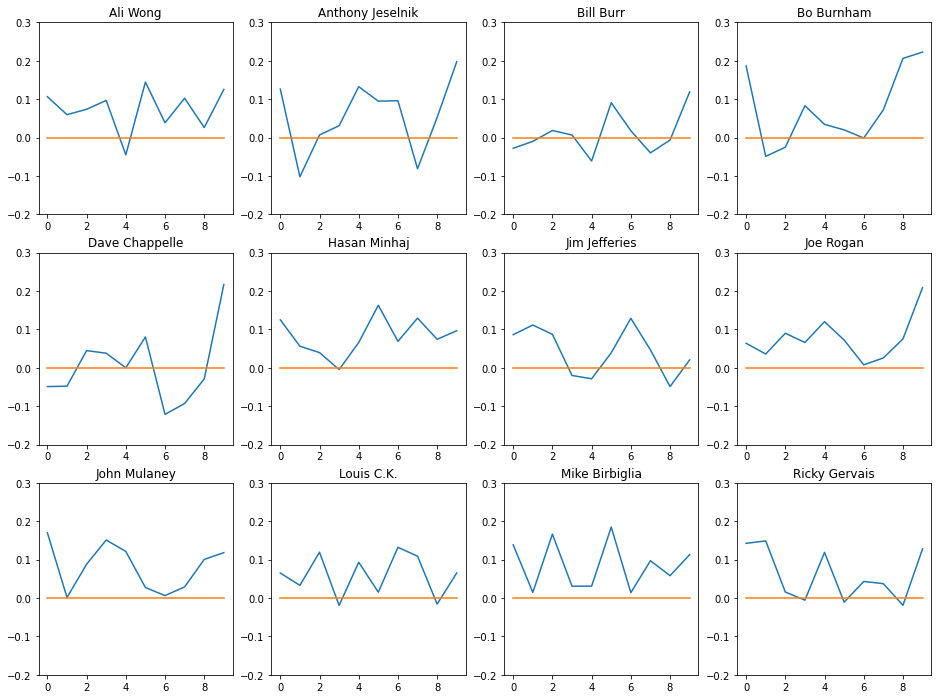

In [59]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(pd_const.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_list[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(pd_const['full_name'][index])
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()

In [60]:
pd_const

,transcript,full_name,polarity,subjectivity,data
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.072369,0.483091,[ladies and gentlemen please welcome to the st...
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.056375,0.567923,[thank you thank you thank you san francisco t...
bill,all right thank you thank you very much thank...,Bill Burr,0.011604,0.545697,[ all right thank you thank you very much than...
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.079147,0.555348,[bo what old macdonald had a farm e i e i o an...
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,0.002027,0.518963,[this is dave he tells dirty jokes for a livin...
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.084056,0.467429,[ whats up davis whats up im home i had to br...
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.042561,0.539928,[ ladies and gentlemen please welcome to the...
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.078400,0.539640,[ ladies and gentlemen welcome joe rogan wh...
john,armed with boyish charm and a sharp wit the fo...,John Mulaney,0.079114,0.493259,[armed with boyish charm and a sharp wit the f...
louis,intro fade the music out lets roll hold there ...,Louis C.K.,0.058069,0.525449,[intro fade the music out lets roll hold there...
